# Homework 2.1 - implement N-gram count

Given a text document, implement a python function to collect n-gram counts from the text. First download your datasets of your choice from project Gutenberg. Or you can load it from the URL directly usng the method from NLTK book (https://www.nltk.org/book/ch03.html).

0. Each team should first decide on two books to download frm project Gutenburg(https://www.gutenberg.org). Use wget (example below) to download the txt version of the books.

1. Please implement your data loading and text cleaning (preprocessing) as well as n-gram count methods in the following class. Feel free to add methods as you need. You can do some exploration to decide level of text cleaning needed. The simplest would be to remove all punctuations, arabic numbers, etc. You can use simple python method, regular expressions, etc. Manually inspect the outcome of your text cleaning. Is it what you expected?

2. Example usage of the class is provided.

3. Run your code and collect n-gram counts from the book. Print out the top ten unigrams, bigrams and trigrams and their counts.

4. Plot a histogram of the top 50 unigram, bigrams and trigrams and their counts. What do you observe in the distribution?

5. Repeat steps 1-5 on both books.

In [1]:
# example download Moby Dick book
# !wget https://www.gutenberg.org/files/2701/2701-0.txt

In [2]:
from collections import defaultdict
import re  # Import the regular expression module

import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

class NgramCount:
    def __init__(self):
        # init
        self.text=""

    def collect_ngram_count(self, n:int):
        """method to collect n-gram counts from text
        Args:
            text: input text document string
            n: n-gram (e.g., 2-gram, 3-gram, etc)
        Returns:
            dict of n-gram counts. e.g., if n==2,
            the dict keys are all possible bigrams strings from the document,
            and the values indicate the number of times that bigram appeared in the document
        """
        tokens = self.preprocess() # a clean list of tokens
        ngram_count_dict = defaultdict(int) # dict of n-gram counts

        for i in range(len(tokens) - n + 1):
            ngram = " ".join(tokens[i:i + n]) # join n tokens into a string
            ngram_count_dict[ngram] += 1

        return ngram_count_dict

    def file_reader(self, file_name:str):
        """method to read text file into string
        Args:
            file_name: the file name of the document you want to process
        Returns:
            nothing, but the class variable self.text should be updated to reflect
            a string representation of the entire document
        """
        try:
          with open(file_name, 'r', encoding='utf-8-sig') as file: # encoding='utf-8-sig': remove "\ufeff"
            self.text = file.read()
        except FileNotFoundError:
          print("File not found.")

    def preprocess(self):
        """method for preprocessing the text, including cleaning up the text, tokenize it, etc., using
        regular expression tools.
        Returns:
            a clean list of tokens in the text document, e.g.,
            ['The','Project','Gutenberg','eBook','of','Moby-Dick','or','The','Whale','by','Herman','Melville',...]
        """
        # Convert to lowercase
        text = self.text.lower()

        # Remove content about Project Gutenberg
        start = text.find("***", text.find("***") + 3, len(text)) + 3
        end = text.rfind("***", 0, text.rfind("***"))
        text = text[start:end]

        # Remove arabic numbers
        text = re.sub(r'\d+', '', text) # replace one or more digits with an empty string

        # Remove punctuations
        text = re.sub(r'[^\w\s]', '', text) # not a word or whitespace - replace with an empty string
        text = re.sub(r'[_]', '', text) # removes underscores within words

        # Tokenize
        tokens = text.split()

        # Remove stop words
        stopWords = set(stopwords.words('english'))
        stopWords.add("chapter") # add customized stop word

        new_tokens = list()

        for word in tokens:
          if word not in stopWords:
            new_tokens.append(word)

        return new_tokens

## Example Usage
```
nc=NgramCount()
nc.file_reader("2701-0.txt")
nc.preprocess()
nc.collect_ngram_count(2)
```
            

## Book 1: Romeo and Juliet

### Data loading and text cleaning (preprocessing)

In [3]:
# Download Romeo and Juliet
!wget https://www.gutenberg.org/ebooks/1513.txt.utf-8

--2023-09-28 22:42:00--  https://www.gutenberg.org/ebooks/1513.txt.utf-8
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.gutenberg.org/cache/epub/1513/pg1513.txt [following]
--2023-09-28 22:42:00--  http://www.gutenberg.org/cache/epub/1513/pg1513.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gutenberg.org/cache/epub/1513/pg1513.txt [following]
--2023-09-28 22:42:00--  https://www.gutenberg.org/cache/epub/1513/pg1513.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169486 (166K) [text/plain]
Saving to: ‘1513.txt.utf-8’

1513.txt.utf-8      100%[===================>] 165.51K   766

In [4]:
nc1 = NgramCount()
nc1.file_reader("1513.txt.utf-8")

In [5]:
clean_list1 = nc1.preprocess()

### Inspect the outcome

In [6]:
clean_list1

['tragedy',
 'romeo',
 'juliet',
 'william',
 'shakespeare',
 'contents',
 'prologue',
 'act',
 'scene',
 'public',
 'place',
 'scene',
 'ii',
 'street',
 'scene',
 'iii',
 'room',
 'capulets',
 'house',
 'scene',
 'iv',
 'street',
 'scene',
 'v',
 'hall',
 'capulets',
 'house',
 'act',
 'ii',
 'chorus',
 'scene',
 'open',
 'place',
 'adjoining',
 'capulets',
 'garden',
 'scene',
 'ii',
 'capulets',
 'garden',
 'scene',
 'iii',
 'friar',
 'lawrences',
 'cell',
 'scene',
 'iv',
 'street',
 'scene',
 'v',
 'capulets',
 'garden',
 'scene',
 'vi',
 'friar',
 'lawrences',
 'cell',
 'act',
 'iii',
 'scene',
 'public',
 'place',
 'scene',
 'ii',
 'room',
 'capulets',
 'house',
 'scene',
 'iii',
 'friar',
 'lawrences',
 'cell',
 'scene',
 'iv',
 'room',
 'capulets',
 'house',
 'scene',
 'v',
 'open',
 'gallery',
 'juliets',
 'chamber',
 'overlooking',
 'garden',
 'act',
 'iv',
 'scene',
 'friar',
 'lawrences',
 'cell',
 'scene',
 'ii',
 'hall',
 'capulets',
 'house',
 'scene',
 'iii',
 'juliet

The outcome of text cleaning is as expected. All words have been converted to lowercase (so the same words with upper or lowercase letters can be considered the same token), there are no Arabic numbers or punctuations (underscores within stage direction words are also removed), and stop words (e.g., "a," "the," "is," "are") have been removed as well to obtain more meaningful n-grams. Introductions to Project Gutenberg are not included, so the text only contains the content of the book. A clean list has been obtained for subsequent construction of n-grams.

### N-gram counts

In [7]:
unigrams1 = sorted(nc1.collect_ngram_count(1).items(), key=lambda x: x[1], reverse=True)
bigrams1 = sorted(nc1.collect_ngram_count(2).items(), key=lambda x: x[1], reverse=True)
trigrams1 = sorted(nc1.collect_ngram_count(3).items(), key=lambda x: x[1], reverse=True)

### Top 10

In [8]:
top_10_unigram1 = unigrams1[:10]
print("Top 10 unigrams and their counts:")
top_10_unigram1

Top 10 unigrams and their counts:


[('romeo', 299),
 ('thou', 277),
 ('juliet', 179),
 ('thy', 170),
 ('nurse', 146),
 ('capulet', 141),
 ('thee', 138),
 ('love', 137),
 ('shall', 110),
 ('lady', 109)]

In [9]:
top_10_bigram1 = bigrams1[:10]
print("Top 10 bigrams and their counts:")
top_10_bigram1

Top 10 bigrams and their counts:


[('friar lawrence', 68),
 ('lady capulet', 60),
 ('thou art', 28),
 ('art thou', 23),
 ('thou wilt', 21),
 ('thou hast', 21),
 ('exeunt scene', 16),
 ('good night', 15),
 ('romeo romeo', 13),
 ('capulets house', 12)]

In [10]:
top_10_trigram1 = trigrams1[:10]
print("Top 10 trigrams and their counts:")
top_10_trigram1

Top 10 trigrams and their counts:


[('friar lawrences cell', 10),
 ('capulet lady capulet', 8),
 ('room capulets house', 6),
 ('hall capulets house', 6),
 ('lady capulet nurse', 6),
 ('enter friar lawrence', 6),
 ('capulets house scene', 5),
 ('exeunt scene ii', 5),
 ('capulets house enter', 5),
 ('enter lady capulet', 5)]

### Top 50

In [11]:
top_50_unigram1 = unigrams1[:50]
top_50_bigram1 = bigrams1[:50]
top_50_trigram1 = trigrams1[:50]

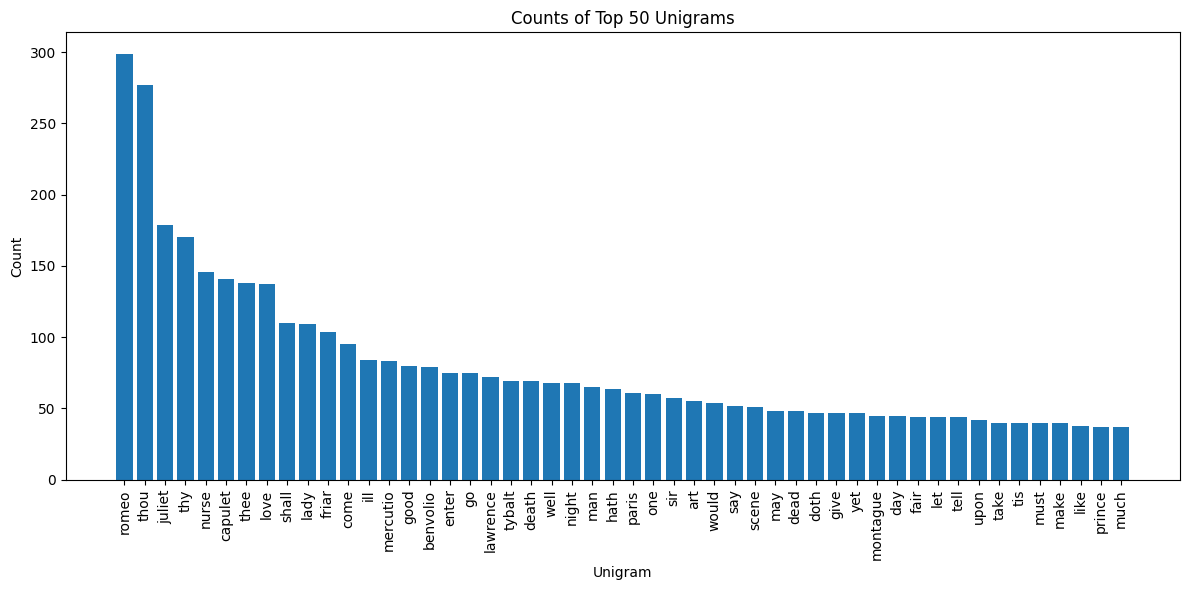

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(dict(top_50_unigram1).keys(), dict(top_50_unigram1).values())
plt.xticks(range(len(dict(top_50_unigram1).keys())), dict(top_50_unigram1).keys(), rotation=90)
plt.title("Counts of Top 50 Unigrams")
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

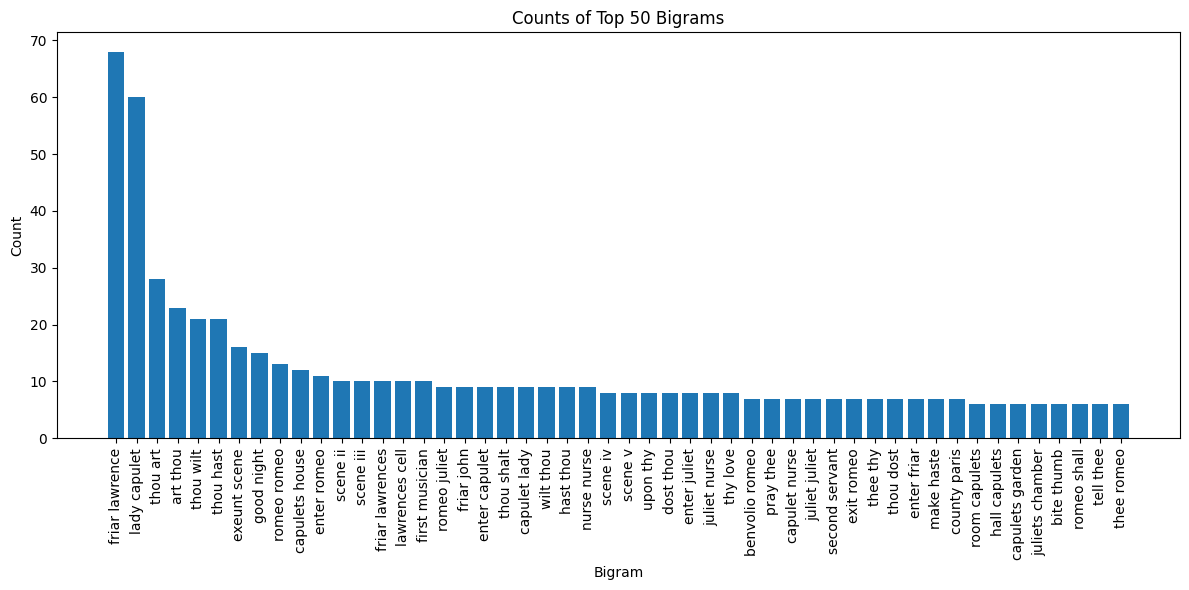

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(dict(top_50_bigram1).keys(), dict(top_50_bigram1).values())
plt.xticks(range(len(dict(top_50_bigram1).keys())), dict(top_50_bigram1).keys(), rotation=90)
plt.title("Counts of Top 50 Bigrams")
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

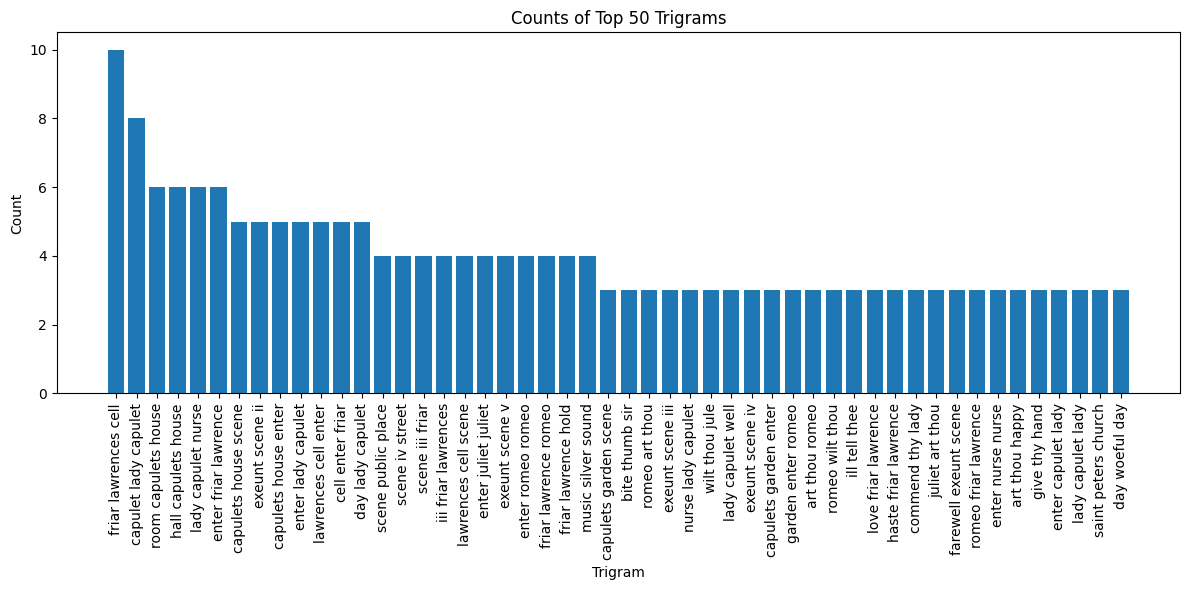

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(dict(top_50_trigram1).keys(), dict(top_50_trigram1).values())
plt.xticks(range(len(dict(top_50_trigram1).keys())), dict(top_50_trigram1).keys(), rotation=90)
plt.title("Counts of Top 50 Trigrams")
plt.xlabel("Trigram")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The distributions (first decreasing rapidly, then relatively steady) show that only a small number of n-grams occur frequently. As is shown in the plots, the top two n-grams have much higher counts than the others, which is especially apparent for the plots of unigrams and bigrams. Trigrams do not have very high counts and many have the same counts, but the general trend is still consistent. The top n-grams are mostly about the main characters and scenes, which makes sense given that this book of Romeo and Juliet is a play with dialogues and acts. If needed, further preprocessing can be conducted to deal with archaic words such as "thou" and "shalt".

## Book 2: Frankenstein

### Data loading and text cleaning (preprocessing)

In [15]:
# Download Frankenstein
!wget https://www.gutenberg.org/ebooks/84.txt.utf-8

--2023-09-28 22:42:07--  https://www.gutenberg.org/ebooks/84.txt.utf-8
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.gutenberg.org/cache/epub/84/pg84.txt [following]
--2023-09-28 22:42:08--  http://www.gutenberg.org/cache/epub/84/pg84.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gutenberg.org/cache/epub/84/pg84.txt [following]
--2023-09-28 22:42:08--  https://www.gutenberg.org/cache/epub/84/pg84.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 448965 (438K) [text/plain]
Saving to: ‘84.txt.utf-8’

84.txt.utf-8        100%[===================>] 438.44K  1.33MB/s    in 0.3s    


In [16]:
nc2 = NgramCount()
nc2.file_reader("84.txt.utf-8")

In [17]:
clean_list2 = nc2.preprocess()

### Inspect the outcome

In [18]:
clean_list2

['frankenstein',
 'modern',
 'prometheus',
 'mary',
 'wollstonecraft',
 'godwin',
 'shelley',
 'contents',
 'letter',
 'letter',
 'letter',
 'letter',
 'letter',
 'mrs',
 'saville',
 'england',
 'st',
 'petersburgh',
 'dec',
 'th',
 'rejoice',
 'hear',
 'disaster',
 'accompanied',
 'commencement',
 'enterprise',
 'regarded',
 'evil',
 'forebodings',
 'arrived',
 'yesterday',
 'first',
 'task',
 'assure',
 'dear',
 'sister',
 'welfare',
 'increasing',
 'confidence',
 'success',
 'undertaking',
 'already',
 'far',
 'north',
 'london',
 'walk',
 'streets',
 'petersburgh',
 'feel',
 'cold',
 'northern',
 'breeze',
 'play',
 'upon',
 'cheeks',
 'braces',
 'nerves',
 'fills',
 'delight',
 'understand',
 'feeling',
 'breeze',
 'travelled',
 'regions',
 'towards',
 'advancing',
 'gives',
 'foretaste',
 'icy',
 'climes',
 'inspirited',
 'wind',
 'promise',
 'daydreams',
 'become',
 'fervent',
 'vivid',
 'try',
 'vain',
 'persuaded',
 'pole',
 'seat',
 'frost',
 'desolation',
 'ever',
 'presents

The outcome of text cleaning is also as expected. All words have been converted to lowercase (so the same words with upper or lowercase letters can be considered the same token), there are no Arabic numbers or punctuations, and stop words (e.g., "a," "the," "is," "are") have been removed as well to obtain more meaningful n-grams. Introductions to Project Gutenberg are not included, so the text only contains the content of the book. A clean list has been obtained for subsequent construction of n-grams.

### N-gram counts

In [19]:
unigrams2 = sorted(nc2.collect_ngram_count(1).items(), key=lambda x: x[1], reverse=True)
bigrams2 = sorted(nc2.collect_ngram_count(2).items(), key=lambda x: x[1], reverse=True)
trigrams2 = sorted(nc2.collect_ngram_count(3).items(), key=lambda x: x[1], reverse=True)

### Top 10

In [20]:
top_10_unigram2 = unigrams2[:10]
print("Top 10 unigrams and their counts:")
top_10_unigram2

Top 10 unigrams and their counts:


[('one', 202),
 ('could', 196),
 ('would', 183),
 ('yet', 152),
 ('man', 131),
 ('upon', 126),
 ('life', 114),
 ('father', 113),
 ('every', 109),
 ('first', 108)]

In [21]:
top_10_bigram2 = bigrams2[:10]
print("Top 10 bigrams and their counts:")
top_10_bigram2

Top 10 bigrams and their counts:


[('old man', 32),
 ('native country', 15),
 ('natural philosophy', 14),
 ('taken place', 13),
 ('mr kirwin', 12),
 ('fellow creatures', 11),
 ('looked upon', 10),
 ('dear victor', 10),
 ('long time', 9),
 ('nothing could', 9)]

In [22]:
top_10_trigram2 = trigrams2[:10]
print("Top 10 trigrams and their counts:")
top_10_trigram2

Top 10 trigrams and their counts:


[('letter mrs saville', 4),
 ('mrs saville england', 4),
 ('letter letter letter', 3),
 ('branch natural philosophy', 3),
 ('return native country', 3),
 ('create another like', 3),
 ('six years passed', 2),
 ('years passed since', 2),
 ('walton letter mrs', 2),
 ('find friend wide', 2)]

### Top 50

In [23]:
top_50_unigram2 = unigrams2[:50]
top_50_bigram2 = bigrams2[:50]
top_50_trigram2 = trigrams2[:50]

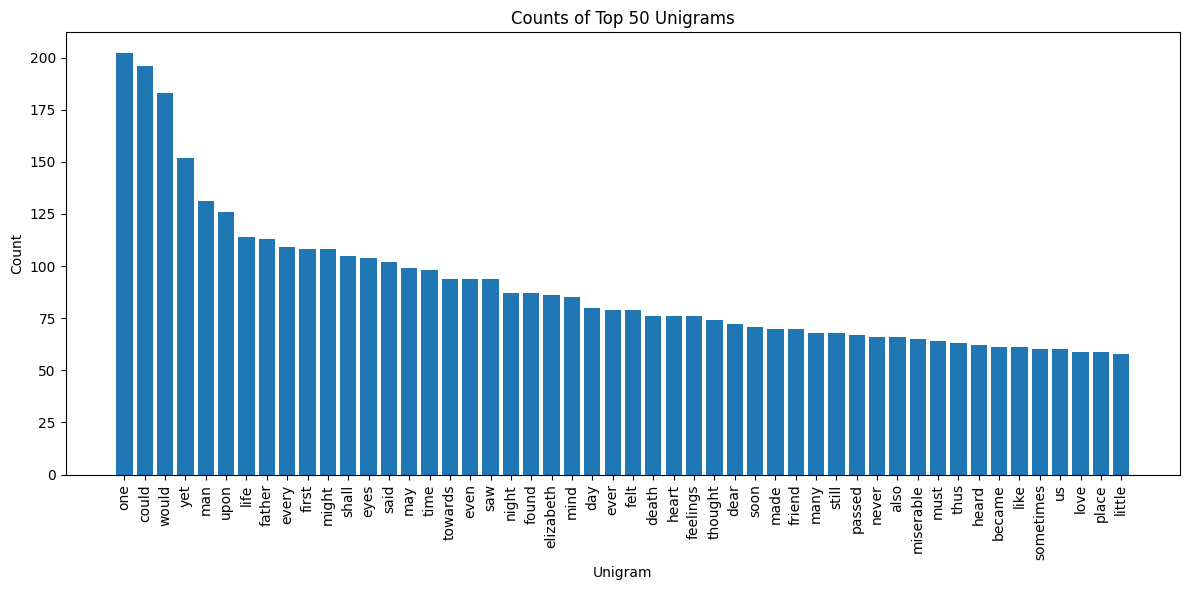

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(dict(top_50_unigram2).keys(), dict(top_50_unigram2).values())
plt.xticks(range(len(dict(top_50_unigram2).keys())), dict(top_50_unigram2).keys(), rotation=90)
plt.title("Counts of Top 50 Unigrams")
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

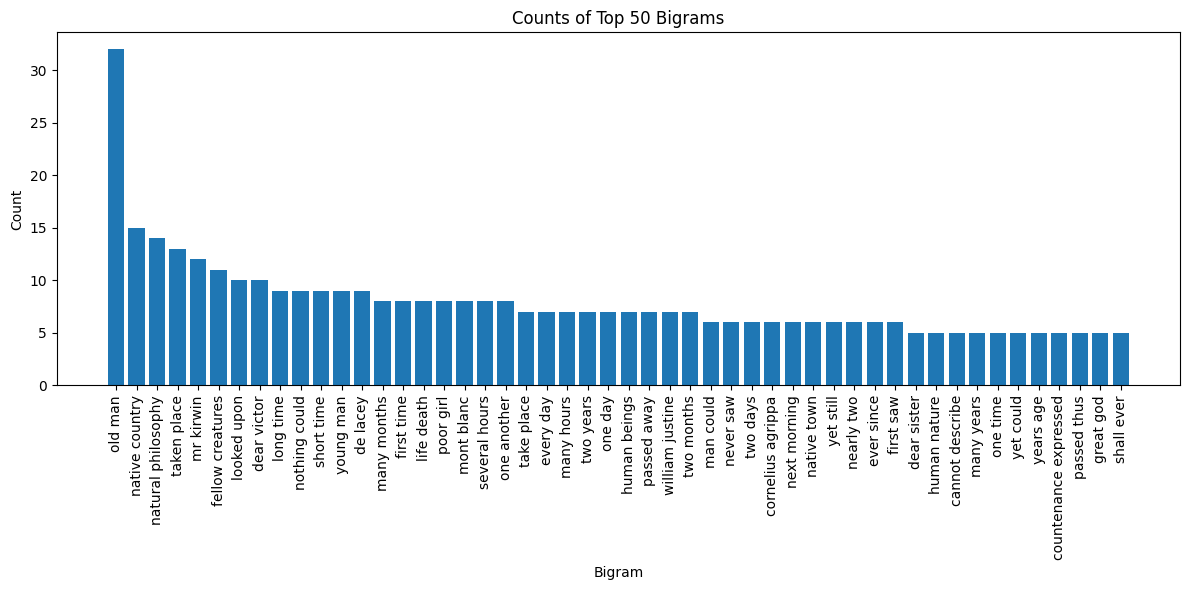

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(dict(top_50_bigram2).keys(), dict(top_50_bigram2).values())
plt.xticks(range(len(dict(top_50_bigram2).keys())), dict(top_50_bigram2).keys(), rotation=90)
plt.title("Counts of Top 50 Bigrams")
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

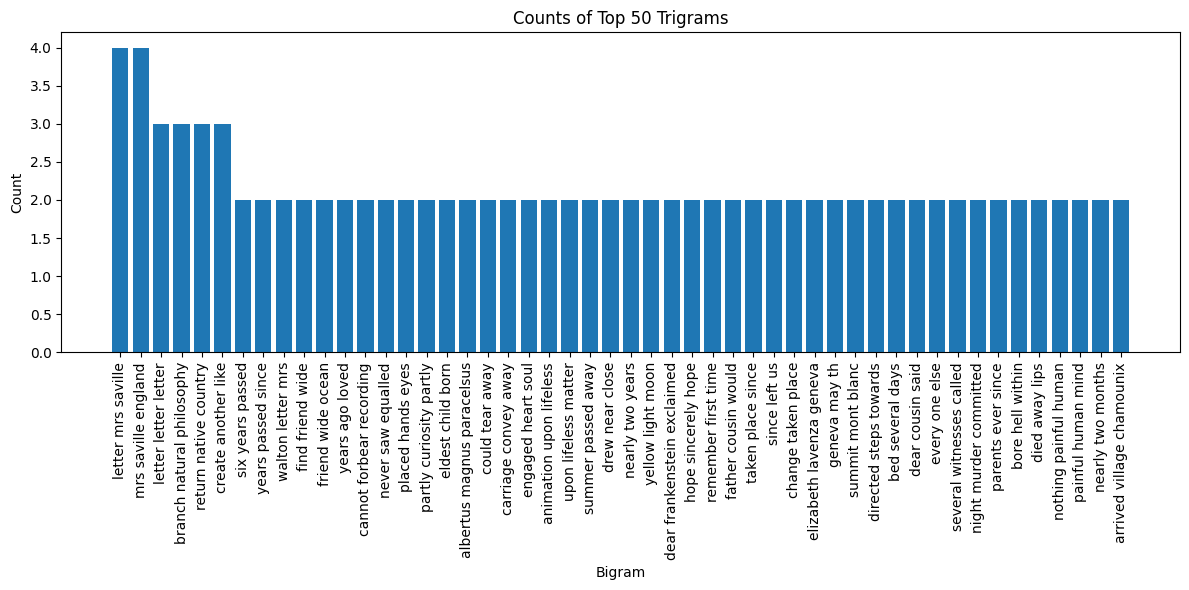

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(dict(top_50_trigram2).keys(), dict(top_50_trigram2).values())
plt.xticks(range(len(dict(top_50_trigram2).keys())), dict(top_50_trigram2).keys(), rotation=90)
plt.title("Counts of Top 50 Trigrams")
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The distributions demonstrate somewhat similar decreasing trends as the previous ones - a small number of n-grams occur more frequently than others. The differences in counts for the unigram and bigram plots are relatively less significant compared to those in the previous plots, but the general trend is still consistent. All trigrams have small counts, so despite the decrease, the trend is not apparent. The trigram "letter letter letter" appears multiple times, however, this is not a meaningful representation of the book, as these tokens are extracted from the content outline. The word "chapter" was added to the stop word set to avoid having "chapter chapter chapter" because it only appears in the outline, but the word "letter" also appears many times in the book, so further preprocessing is required to address this issue.